In [1]:
import cv2
import numpy as np

### Image translation/shifting

In [2]:
img = cv2.imread('images/sachin.jpg')

In [3]:
# Get the shape of the image
height, width, _ = img.shape

In [4]:
quarter_height, quarter_width = height//4, width//4

In [5]:
# Translation matrix
T = np.float32([[1,0,quarter_width],[0,1,quarter_height]]) # crop the image 25% in heigth and width

In [6]:
T

array([[  1.,   0., 212.],
       [  0.,   1., 268.]], dtype=float32)

In [7]:
img_trans = cv2.warpAffine(img, T, (width,height))

In [8]:
cv2.imshow('translated image',img_trans)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
T = np.float32([[1,0,50],[0,1,100]]) # We can also give the values manually

In [10]:
img_trans = cv2.warpAffine(img, T, (width,height))
cv2.imshow('translated image',img_trans)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
T = np.float32([[1,0,-50],[0,1,-100]]) # We can also give the values manually

In [12]:
img_trans = cv2.warpAffine(img, T, (width,height))
cv2.imshow('translated image',img_trans)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Image rotation

In [13]:
img_rot = cv2.rotate(img, cv2.ROTATE_180)

In [14]:
cv2.imshow('Rotated image',img_rot)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
img_rot = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

In [16]:
cv2.imshow('Rotated image',img_rot)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
# get the center value
center = img.shape[1] // 2 , img.shape[0] // 2

In [18]:
center

(425, 537)

In [19]:
# create the rotation matrix (center,angle,scale)
angle = 60
rotation_matrix = cv2.getRotationMatrix2D(center,angle,1.0)

In [20]:
# create the rotated image
rotated_image = cv2.warpAffine(img, rotation_matrix,(width,height))

In [21]:
cv2.imshow('Rotated image',rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# create the rotation matrix (center,angle,scale)
angle = 60
rotation_matrix = cv2.getRotationMatrix2D((500,500),75,1.0)  # clockwise

In [23]:
# create the rotated image
rotated_image = cv2.warpAffine(img, rotation_matrix,(1100,1100))

In [24]:
cv2.imshow('Rotated image',rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
# create the rotation matrix (center,angle,scale)
angle = 60
rotation_matrix = cv2.getRotationMatrix2D((500,500),-50,1.0)  # anticlockwise

In [26]:
# create the rotated image
rotated_image = cv2.warpAffine(img, rotation_matrix,(800,800))
cv2.imshow('Rotated image',rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Rotation using PIL

In [27]:
from PIL import Image

In [28]:
img_pil = Image.open('images/sachin.jpg')

In [29]:
rot_img = img_pil.transpose(Image.ROTATE_90)

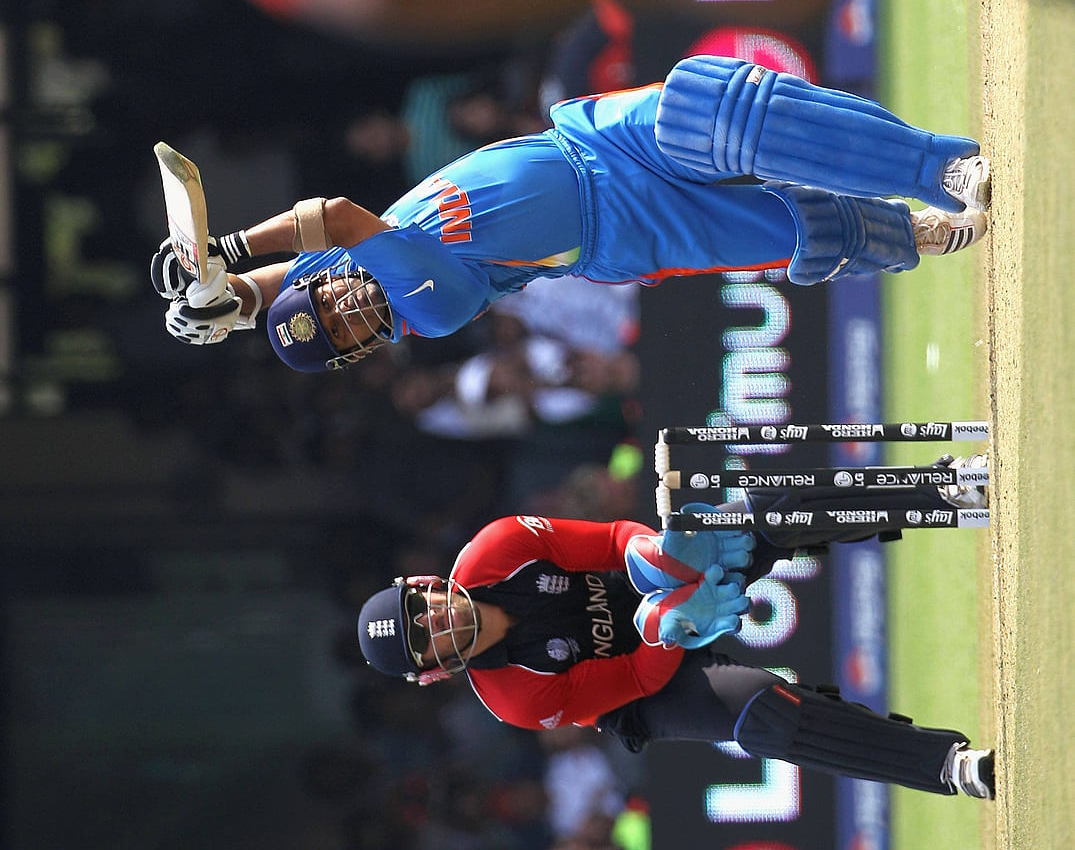

In [30]:
rot_img

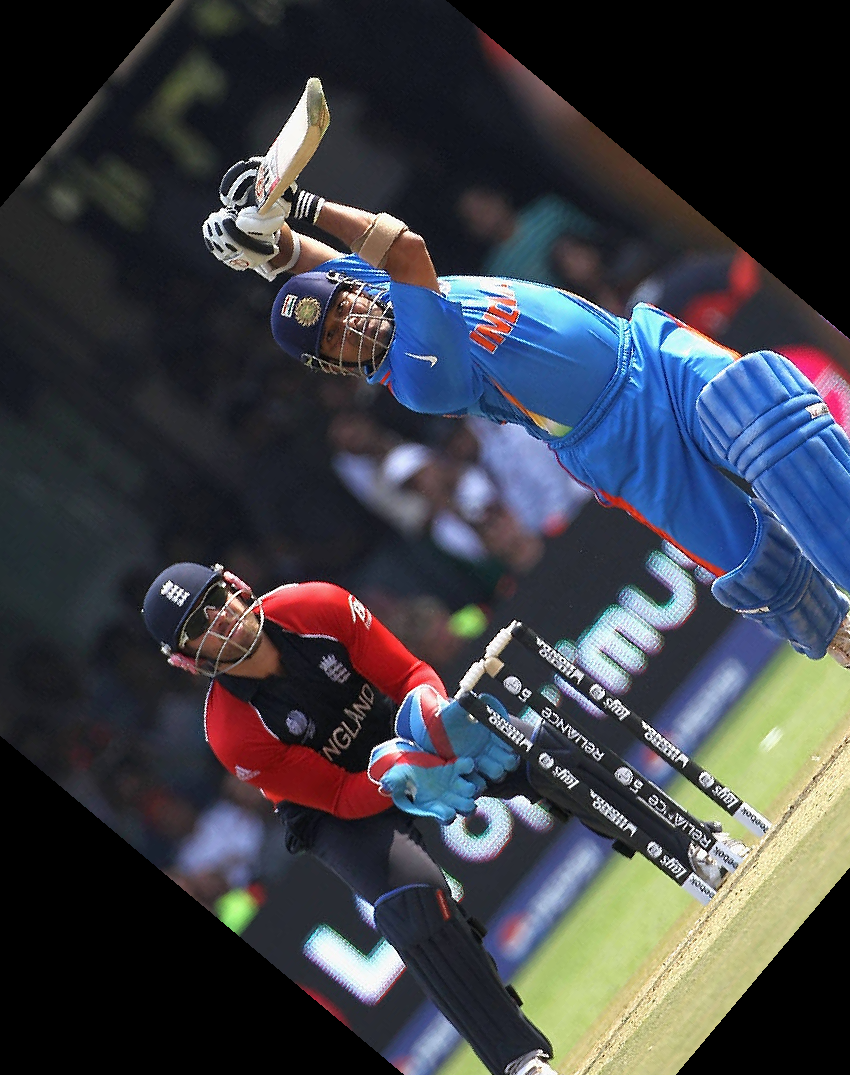

In [31]:
img_pil.rotate(50)

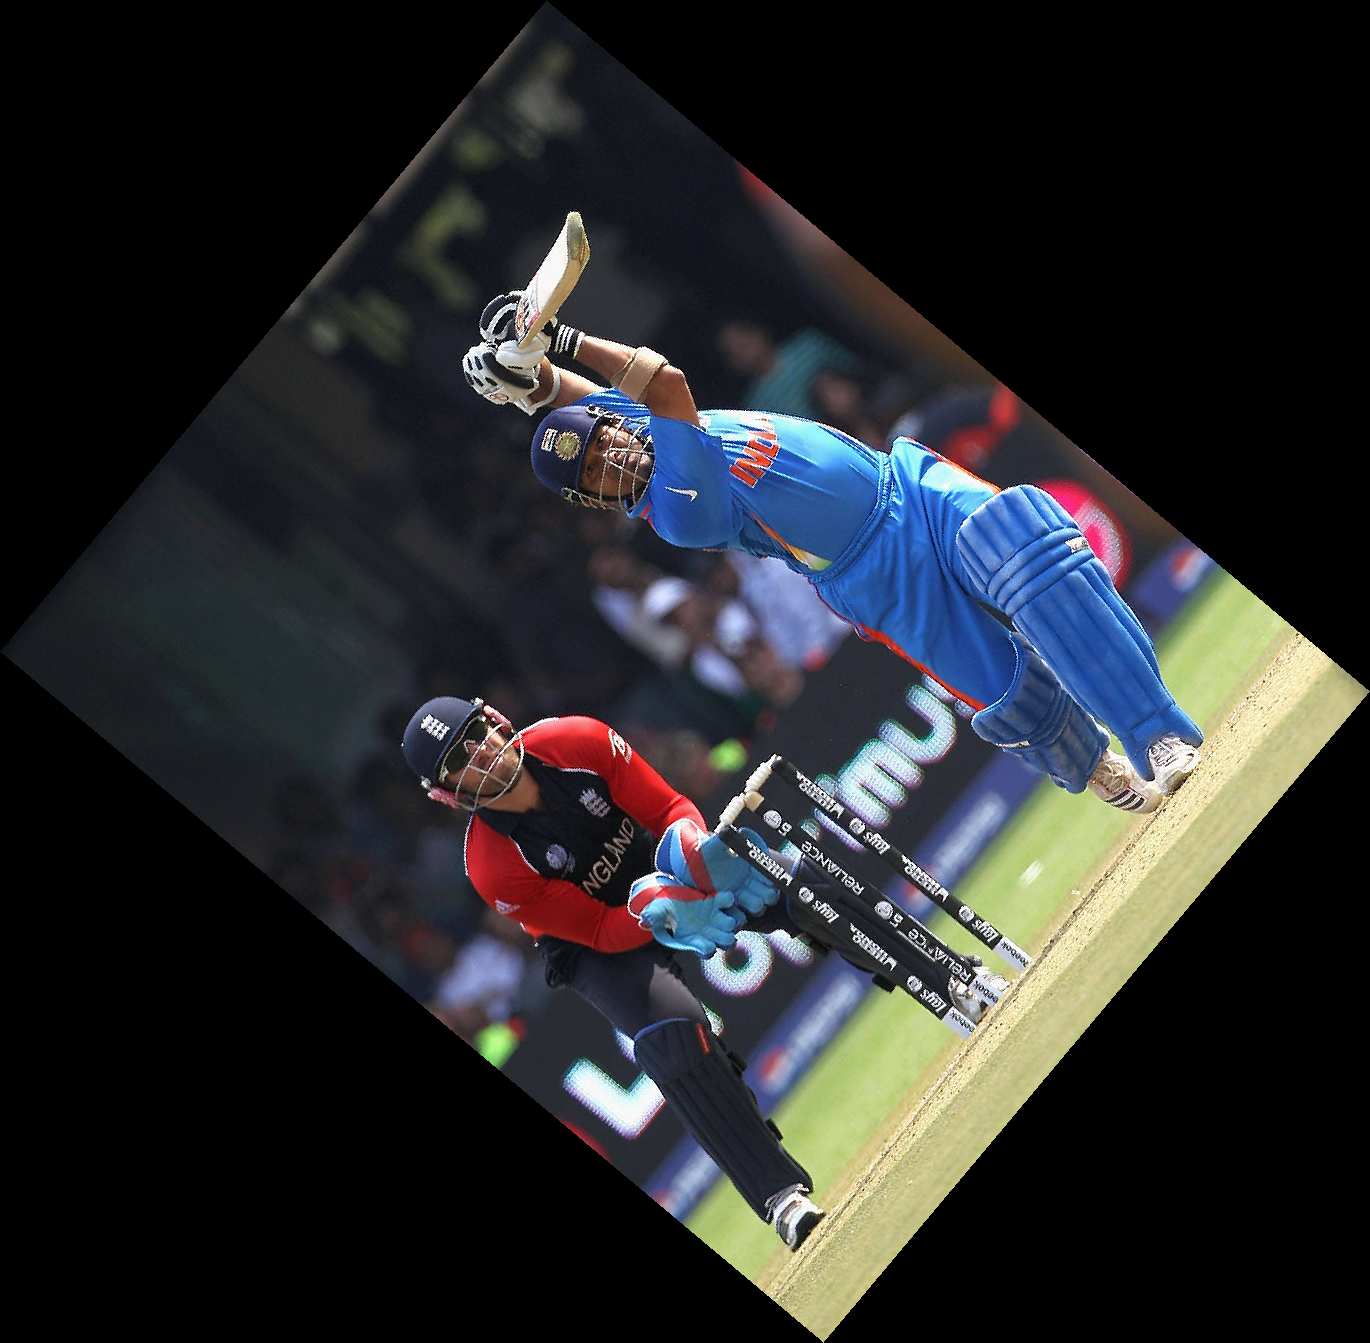

In [32]:
# image rotated will not loss the pixels
img_pil.rotate(50, expand=True)

### Image Resizing/Resampling/Rescaling

In [33]:
help(cv2.resize)

Help on built-in function resize:

resize(...)
    resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
    .   @brief Resizes an image.
    .
    .   The function resize resizes the image src down to or up to the specified size. Note that the
    .   initial dst type or size are not taken into account. Instead, the size and type are derived from
    .   the `src`,`dsize`,`fx`, and `fy`. If you want to resize src so that it fits the pre-created dst,
    .   you may call the function as follows:
    .   @code
    .       // explicitly specify dsize=dst.size(); fx and fy will be computed from that.
    .       resize(src, dst, dst.size(), 0, 0, interpolation);
    .   @endcode
    .   If you want to decimate the image by factor of 2 in each direction, you can call the function this
    .   way:
    .   @code
    .       // specify fx and fy and let the function compute the destination image size.
    .       resize(src, dst, Size(), 0.5, 0.5, interpolation);
    .   @endcode
   

In [34]:
resized_img = cv2.resize(img,(700,800))

In [35]:
cv2.imshow('resized image',resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Image scaling

In [36]:
rescaled_image = cv2.resize(img, None, fx=0.5, fy=0.5) # by default fx and fy are 1

In [37]:
cv2.imshow('resized image',rescaled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
rescaled_image = cv2.resize(img, None, fx=1.75, fy=0.80)
cv2.imshow('resized image',rescaled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
rescaled_image.shape

(860, 1488, 3)

In [41]:
resized_img.shape

(800, 700, 3)

### Resizing using PIL

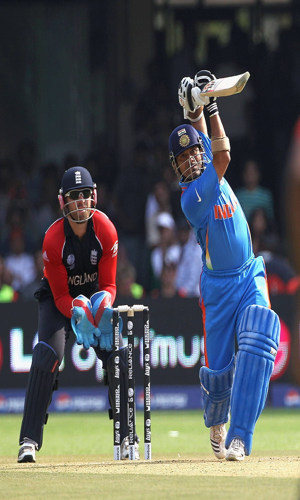

In [42]:
img_pil.resize((300,500))

### Resizing using skimage

In [43]:
from skimage.transform import resize
import matplotlib.pyplot as plt

In [44]:
img_ski = plt.imread('images/sachin.jpg')

In [45]:
res_img = resize(img_ski, (400,250))

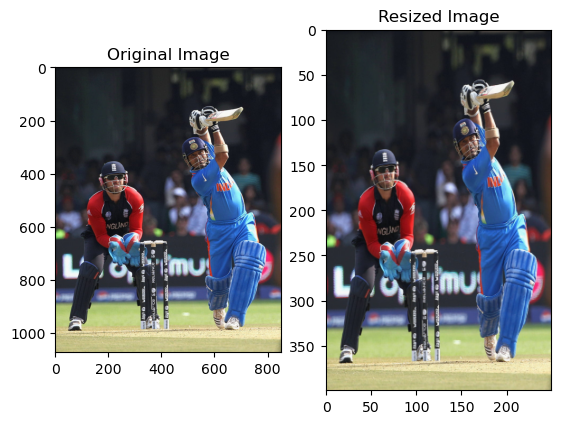

In [46]:
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_ski)
plt.subplot(1,2,2)
plt.title('Resized Image')
plt.imshow(res_img)

### Image Flipping (Horizontal, Vertical, Diagonal)

In [47]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [48]:
# Horizontal Flip
flip_hor = cv2.flip(img_rgb,0)

# vertical Flip
flip_ver = cv2.flip(img_rgb,1)

# diagonal flip
flip_dia = cv2.flip(img_rgb,-1)

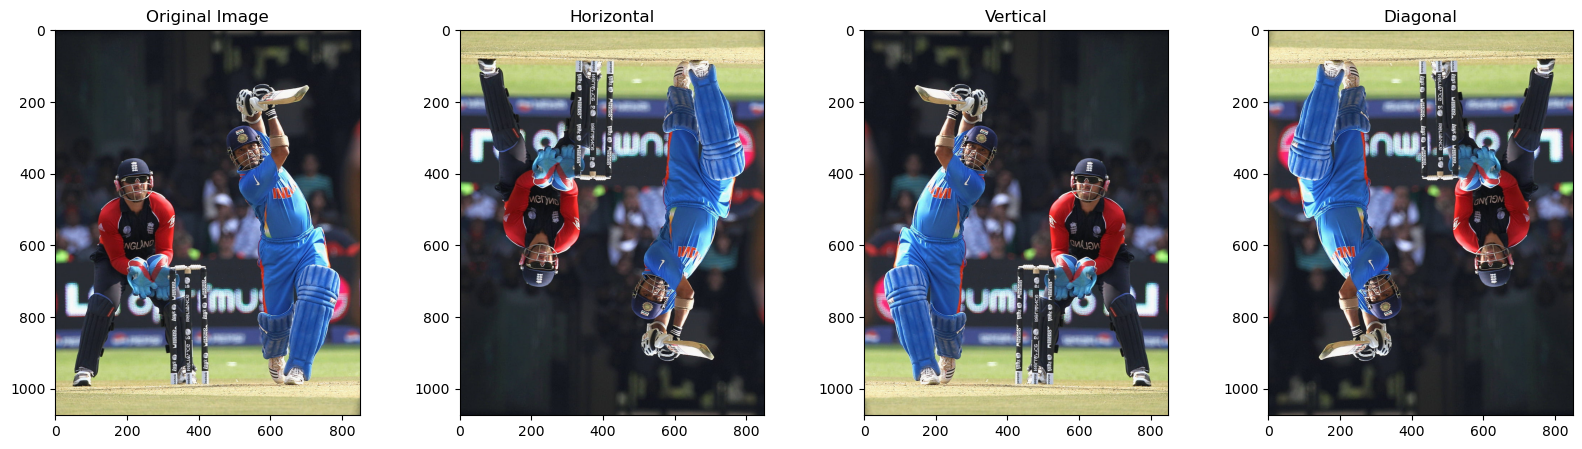

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.subplot(1,4,2)
plt.title('Horizontal')
plt.imshow(flip_hor)
plt.subplot(1,4,3)
plt.title('Vertical')
plt.imshow(flip_ver)
plt.subplot(1,4,4)
plt.title('Diagonal')
plt.imshow(flip_dia)

###  Image Cropping

In [50]:
img_cr = plt.imread('images/sachin.jpg')

In [51]:
heigth , width = img_cr.shape[:2]

In [52]:
cr_height = int(heigth *0.15)
cr_width = int(width*0.15)

In [53]:
cropped_img = img[cr_height:heigth-cr_height,cr_width:width-cr_width]

In [54]:
cv2.imshow('Cropped Image',cropped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
cropped_img = img[100:400,150:500]
cv2.imshow('Cropped Image',cropped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

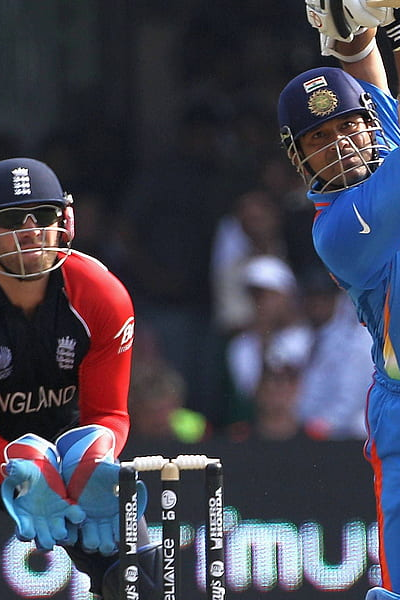

In [56]:
img_pil.crop((200,200,600,800))

### Image Shearing

In [72]:
# positive side
shear_x = 0.25
shear_y = 0.40

M = np.array([[1,shear_x,0],
              [shear_y,1,0],
              [0,0,1]])

In [73]:
M

array([[1.  , 0.25, 0.  ],
       [0.4 , 1.  , 0.  ],
       [0.  , 0.  , 1.  ]])

In [74]:
img_shear = cv2.warpPerspective(img, M, (width,height))

In [75]:
cv2.imshow('Sheared Image',img_shear)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [76]:
# negative side
shear_x = -0.25
shear_y = -0.40

M = np.array([[1,shear_x,0],
              [shear_y,1,0],
              [0,0,1]])

In [77]:
img_shear = cv2.warpPerspective(img, M, (width,height))

In [78]:
cv2.imshow('Sheared Image',img_shear)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [79]:
# Combination of both
img_res = cv2.resize(img, (500,600))
img_shear = cv2.warpPerspective(img, M, (width,height))
cv2.imshow('Sheared Image',img_shear)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Affine Transformation

In [80]:
tx = 50 # translation on x axis
ty = 100  # translation on y axis
angle = 45 # rotation
scale = 0.8 # scaling factor
shear_x = 0.25 # tilt on x axis 
shear_y = 0.3 # tilt on y axis 

# define the affine transformation matrix
M = np.float32([[scale*np.cos(np.radians(angle)),shear_x,tx],
               [shear_y, scale*np.sin(np.radians(angle)), ty]])

In [81]:
M

array([[  0.56568545,   0.25      ,  50.        ],
       [  0.3       ,   0.56568545, 100.        ]], dtype=float32)

In [82]:
img_new = cv2.warpAffine(img, M, (width,height))

In [83]:
cv2.imshow('final image',img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [86]:
img_new = cv2.warpAffine(img, M, (700,900))
cv2.imshow('final image',img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [87]:
tx = 60 # translation on x axis
ty = 120  # translation on y axis
angle = 50 # rotation
scale = 0.5 # scaling factor
shear_x = 0.67 # tilt on x axis 
shear_y = 0.8 # tilt on y axis 

# define the affine transformation matrix
M = np.float32([[scale*np.cos(np.radians(angle)),shear_x,tx],
               [shear_y, scale*np.sin(np.radians(angle)), ty]])
img_new = cv2.warpAffine(img, M, (700,900))
cv2.imshow('final image',img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [92]:
a1 = np.array([1,2,3])
a2 = np.array([4,5,6])
a1*a2

array([ 4, 10, 18])

In [93]:
a1@a2

32